In [1]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [3]:
X_train=np.loadtxt("C:\\Users\\saipr\\Downloads\\Image Classification CNN Keras Dataset-20241015T084907Z-001\\Image Classification CNN Keras Dataset\\input.csv",delimiter=',')

In [4]:
Y_train=np.loadtxt("C:\\Users\\saipr\\Downloads\\Image Classification CNN Keras Dataset-20241015T084907Z-001\\Image Classification CNN Keras Dataset\\labels.csv",delimiter=',')

In [5]:
X_test=np.loadtxt("C:\\Users\\saipr\\Downloads\\Image Classification CNN Keras Dataset-20241015T084907Z-001\\Image Classification CNN Keras Dataset\\input_test.csv",delimiter=',')

In [6]:
Y_test=np.loadtxt("C:\\Users\\saipr\\Downloads\\Image Classification CNN Keras Dataset-20241015T084907Z-001\\Image Classification CNN Keras Dataset\\labels_test.csv",delimiter=',')

In [7]:
print("Shape of X_train:", X_train.shape)

Shape of X_train: (2000, 30000)


In [8]:
X_train=X_train.reshape(len(X_train),100,100,3)
Y_train=Y_train.reshape(len(Y_train),1)
X_test=X_test.reshape(len(X_test),100,100,3)
Y_test=Y_test.reshape(len(Y_test),1)


In [11]:
X_train=X_train/255
X_test=X_test/255

In [12]:
X_train.shape

(2000, 100, 100, 3)

In [60]:
X_train[0].shape

(100, 100, 3)

In [20]:
import matplotlib.pyplot as plt
import random

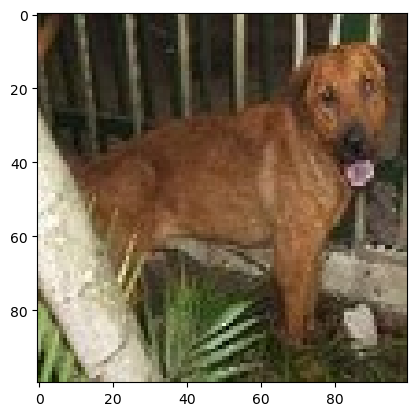

In [59]:
plt.imshow(X_train[0])
plt.show()

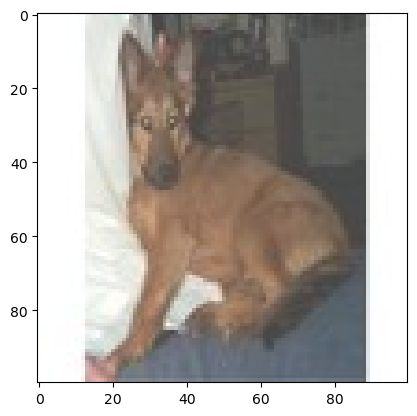

In [32]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

## Model

In [44]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


c:\Users\saipr\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 98, 98, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 49, 49, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 47, 47, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 16928)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │     1,083,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,093,665 (4.17 MB)

 Trainable params: 1,093,665 (4.17 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [47]:
model.fit(X_train,Y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 105ms/step - accuracy: 0.5033 - loss: 0.7925
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 4s 108ms/step - accuracy: 0.5208 - loss: 0.6912
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - accuracy: 0.6125 - loss: 0.6570
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 104ms/step - accuracy: 0.6881 - loss: 0.5811
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 106ms/step - accuracy: 0.7421 - loss: 0.5187


In [48]:
model.evaluate(X_test,Y_test)

13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - accuracy: 0.7990 - loss: 0.4761


[0.60137540102005, 0.7049999833106995]

## Making Predictions

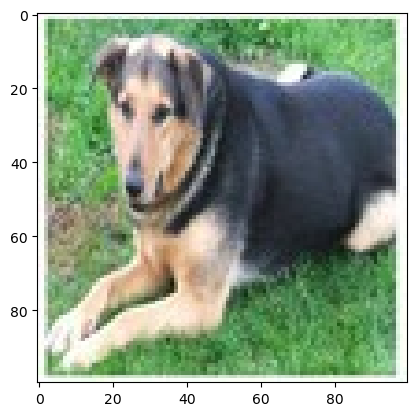

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Our model says it is a Dog


In [58]:
idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2, :].reshape(1,100,100,3))
y_pred=y_pred>0.5
if(y_pred==0):
    pred='Dog'
else:
    pred='cat'
print("Our model says it is a",pred)